In [67]:
from keras.datasets import fashion_mnist

In [68]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

In [69]:
fashion_mnist

<module 'keras.datasets.fashion_mnist' from '/usr/local/lib/python3.8/dist-packages/keras/datasets/fashion_mnist.py'>

In [70]:
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()


In [71]:
# Split the data into training and testing
(trainX, trainY), (testX, testY) = fashion_mnist.load_data()

# Print the dimensions of the dataset
print('Train: X = ', trainX.shape)
print('Test: X = ', testX.shape)


Train: X =  (60000, 28, 28)
Test: X =  (10000, 28, 28)


In [72]:
trainY[0]

9

In [73]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

### **Q1**

---



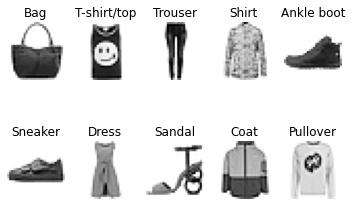

In [74]:
j=0 #j corresponds to the spot index in the subplot 
classSet=set()
for i in range(100,150):#i corresponds to the img index 
  # lastClass=trainY[i]
  if(j>9):
    break
  if(trainY[i] not in classSet):
    classSet.add(trainY[i])
    plt.subplot(2,5,j+1);j+=1
    plt.imshow(trainX[i], cmap="Greys")
    plt.axis('off') # off the axis
    plt.title('{}'.format(class_labels[trainY[i]]))

### **Q2**

---


In [75]:
trainX = trainX.reshape(trainX.shape[0], 784)
testX = testX.reshape(testX.shape[0], 784)

In [76]:
#feature Scaling
trainX=trainX/255.0
testX=testY/255.0

In [77]:
trainY[0]

9

In [78]:
# Split the X_train into a training set and validation set
trainX, valX, trainY, valY = train_test_split(trainX, trainY, test_size=0.2, random_state=100)

In [79]:
numLayers=4 #3 hidden layers
numHiddenLayers=numLayers-1
numNeurons=5
numClasses=10

In [80]:
W = []
W.append((np.random.randn(784,numNeurons)))
for i in range (2 , numHiddenLayers+1): #Hiddenlayer 1 to last hidden layer (starts from 2 coz first layer is init just above)
  W.append((np.random.randn(numNeurons,numNeurons)))
W.append((np.random.randn(numNeurons,numClasses)))

W= np.array(W)

<ipython-input-80-dd02c510618e>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  W= np.array(W)


In [81]:
b = []
for i in range (1 , numLayers): #Hiddenlayer1 to last hidden layer
  b.append(np.zeros((numNeurons,1)))
b.append(np.zeros((numClasses,1)))
b= np.array(b)

<ipython-input-81-fe0577a20a62>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b= np.array(b)


In [82]:
def g(a):        #sigmoid
    return 1.0 / (np.exp(-a)+1.0)
def o(a):#softmax
    return np.exp(a)/np.sum(np.exp(a),axis=0)

# **feed_forward**

In [83]:
a=[None]*(numLayers)
h=[None]*(numLayers)

k=0

def feed_forward(W,h,a,X,b):
  h[0]=X.T
  for k in range(0, numLayers-1): #for all layers
    # print(k)
    a_k=b[k]+np.matmul(W[k].T,h[k]) #0-based Indexing
    h_k=g(a_k)
    a[k]=(a_k)
    h[k+1]=(h_k)
  a[numLayers-1]=b[numLayers-1]+np.matmul(W[numLayers-1].T,h[numLayers-1])
  output=o(a[numLayers-1])
  return (output,a,h)


### **Q3**
---



In [84]:
numSamples=trainX.shape[0]
numSamples

48000

In [85]:
oneHot_y=[]
for i in range(0,numSamples):
  temp=np.zeros(numClasses)
  temp[trainY[i]]=1
  oneHot_y.append(temp)
oneHot_y=np.array(oneHot_y)


In [86]:
def grad_sigmoid(a):
  return g(a)*(1-g(a))

## **Back_propagation**

In [87]:
grad_a=[None]*(numLayers)
grad_b=[None]*(numLayers)
grad_h=[None]*(numLayers)
grad_w=[None]*(numLayers)

In [88]:
def back_propagation(a,h,y_pred,Y):
  oneHot_y=compute_oneHot_y(Y)
  grad_a[numLayers-1]=y_pred-oneHot_y.T #k-dim

  for k in range (numLayers-1,-1,-1): #reverse loop

    grad_w[k]=np.matmul(grad_a[k], h[k].T)
    grad_b[k]=np.sum(grad_a[k],axis=1,keepdims=True)/numSamples
    
    grad_h[k]=np.matmul(W[k],grad_a[k])
    
    if(k>0):
      grad_a[k-1] =grad_h[k] * grad_sigmoid(a[k-1])
  return (grad_b,grad_w)


In [89]:
def compute_oneHot_y(Y):
  oneHot_y=[]
  for i in range(0,Y.shape[0]):
    temp=np.zeros(numClasses)
    temp[Y[i]]=1
    oneHot_y.append(temp)
  oneHot_y=np.array(oneHot_y)
  return oneHot_y

In [90]:
def compute_loss(y_pred,oneHot_y,batch_size):
  return (-1.0 * np.sum(np.multiply(oneHot_y.T, np.log(y_pred)))/batch_size)

In [91]:
def get_accuracy(Y_true,Y_pred):
  count = 0
  for i in range(Y_true.shape[0]):
    max_i = 0
    #index of predicted class
    max_j = 0
    for j in range(10):
      if (Y_pred[i][j]>max_i):
        max_j = j
        max_i = Y_pred[i][j]
    if (Y_true[i] == max_j):
      count+=1
    accuracy=count/Y_true.shape[0]
  return accuracy


### **Vanilla** **GD**

In [63]:
#VGD train set
epochs=50
neta=0.001
batch_size=trainX.shape[0]

for i in range(0, epochs):
    y_pred,a,h=feed_forward(W,h,a,trainX,b)
    grad_b,grad_w=back_propagation(a,h,y_pred,trainY)
    Grad_w=np.array(grad_w)
    for i in range(0,Grad_w.shape[0]):
      Grad_w[i]=Grad_w[i].T
    Grad_b=np.array(grad_b)
    W=W-0.001*Grad_w
    b=b-0.001*Grad_b
    print(compute_loss(y_pred,compute_oneHot_y(trainY),batch_size))


<ipython-input-63-e28fa60cd1e5>:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_w=np.array(grad_w)
<ipython-input-63-e28fa60cd1e5>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_b=np.array(grad_b)


2.940822389296851
3.602100933093508
2.302477852535584
2.3024756232026267
2.3024733245384206
2.3024709526326634
2.3024685032588312
2.302465971855072
2.3024633535051433
2.302460642919197
2.302457834414043
2.3024549218924126
2.302451898820776
2.3024487582056286
2.3024454925688222
2.302442093923668
2.3024385537548153
2.3024348630060802


KeyboardInterrupt: ignored

In [ ]:
#VGD validation set
epochs=1
neta=0.001
batch_size=valX.shape[0]
for i in range(0, epochs):
    y_pred,a,h=feed_forward(W,h,a,valX)
    print(compute_loss(y_pred,compute_oneHot_y(valY),batch_size))

In [ ]:
get_accuracy(valY,y_pred.T)*100

### **SGD**

In [ ]:
#sgd
epochs=50
neta=0.001
batch_size=trainX.shape[0]
for j in range(0,epochs):
  for i in range(0, trainX.shape[0],batch_size):
    y_pred,a,h=feed_forward(W,h,a,trainX[i:i+batch_size])
    grad_b,grad_w=back_propagation(a,h,y_pred,trainY[i:i+batch_size])
    Grad_w=np.array(grad_w)
    for i in range(0,Grad_w.shape[0]):
      Grad_w[i]=Grad_w[i].T
    Grad_b=np.array(grad_b)
    W=W-0.001*Grad_w
    b=b-0.001*Grad_b
  y_pred,a,h=feed_forward(W,h,a,trainX)
  print(compute_loss(y_pred,compute_oneHot_y(trainY),batch_size=trainX.shape[0]))


In [ ]:
#SGD validation set
epochs=1
neta=0.001
batch_size=valX.shape[0]
for i in range(0, epochs):
    y_pred,a,h=feed_forward(W,h,a,valX)
    print(compute_loss(y_pred,compute_oneHot_y(valY),batch_size))

In [ ]:
get_accuracy(valY,y_pred.T)*100

### **SGDMOM**

In [65]:
#sgdmom with batches
epochs=50
neta=0.001
batch_size=100
u_w=0
u_b=0 
beta=0.995
for j in range(0,epochs):
  for i in range(0, trainX.shape[0],batch_size):
    y_pred,a,h=feed_forward(W,h,a,trainX[i:i+batch_size])
    grad_b,grad_w=back_propagation(a,h,y_pred,trainY[i:i+batch_size])
    Grad_w=np.array(grad_w)
    for i in range(0,Grad_w.shape[0]):
      Grad_w[i]=Grad_w[i].T
    Grad_b=np.array(grad_b)
    u_w=beta*u_w+(1-beta)*Grad_w
    u_b=beta*u_b+(1-beta)*Grad_b
    W=W-0.001*u_w
    b=b-0.001*u_b
  y_pred,a,h=feed_forward(W,h,a,trainX)
  print(compute_loss(y_pred,compute_oneHot_y(trainY),batch_size=trainX.shape[0]))

<ipython-input-65-d88f81d5d3d6>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_w=np.array(grad_w)
<ipython-input-65-d88f81d5d3d6>:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_b=np.array(grad_b)


2.3024275276183985
2.3024234837055624
2.302419124878198
2.3024145522036794
2.3024097638806196
2.302404748384142
2.3023994927312725
2.3023939830182845
2.302388204190112
2.302382139693057
2.3023757711016817


KeyboardInterrupt: ignored

In [ ]:
#SGDMOM Vanilla train set --not required
# epochs=50
# neta=0.001
# batch_size=trainX.shape[0]
# u=0 
# beta=0.995
# for i in range(0, epochs):
#     y_pred,a,h=feed_forward(W,h,a,trainX)
#     grad_b,grad_w=back_propagation(a,h,y_pred)
#     Grad_w=np.array(grad_w)
#     for i in range(0,Grad_w.shape[0]):
#       Grad_w[i]=Grad_w[i].T
#     Grad_b=np.array(grad_b)
#     u=beta*u+Grad_w
#     W=W-0.001*u
#     b=b-0.001*Grad_b
#     print(compute_loss(y_pred,compute_oneHot_y(trainY),batch_size))

In [ ]:
#SGDMOM validation set
epochs=1
neta=0.001
batch_size=valX.shape[0]
for i in range(0, epochs):
    y_pred,a,h=feed_forward(W,h,a,valX)
    print(compute_loss(y_pred,compute_oneHot_y(valY),batch_size))

In [ ]:
get_accuracy(valY,y_pred.T)*100

### **NAGD**

In [92]:
W_L = []
W_L.append((np.zeros([784,numNeurons])))
for i in range (2 , numHiddenLayers+1): #Hiddenlayer 1 to last hidden layer (starts from 2 coz first layer is init just above)
  W_L.append((np.zeros([numNeurons,numNeurons])))
W_L.append((np.zeros([numNeurons,numClasses])))

W_L= np.array(W_L)

<ipython-input-92-9bf8a3b4f060>:7: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  W_L= np.array(W_L)


In [93]:
b_L = []
for i in range (1 , numLayers): #Hiddenlayer1 to last hidden layer
  b_L.append(np.zeros((numNeurons,1)))
b_L.append(np.zeros((numClasses,1)))
b_L= np.array(b_L)

<ipython-input-93-bcd28ede2127>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  b_L= np.array(b_L)


In [95]:
#NAGD
epochs=50
neta=0.001
batch_size=100
u_w=W
u_b=b
beta=0.995
for j in range(0,epochs):
  for i in range(0, trainX.shape[0],batch_size):
    W_L=W-beta*u_w
    b_L=b-beta*u_b
    y_pred,a,h=feed_forward(W_L,h,a,trainX[i:i+batch_size],b_L)
    grad_b,grad_w=back_propagation(a,h,y_pred,trainY[i:i+batch_size])
    Grad_w=np.array(grad_w)

    for i in range(0,Grad_w.shape[0]):
      Grad_w[i]=Grad_w[i].T
    Grad_b=np.array(grad_b)
    u_w=beta*u_w+(1-beta)*Grad_w
    u_b=beta*u_b+(1-beta)*Grad_b
    W=W-0.001*u_w
    b=b-0.001*u_b
  y_pred,a,h=feed_forward(W,h,a,trainX,b)
  print(compute_loss(y_pred,compute_oneHot_y(trainY),batch_size=trainX.shape[0]))

<ipython-input-95-870aa9c4f624>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_w=np.array(grad_w)
<ipython-input-95-870aa9c4f624>:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  Grad_b=np.array(grad_b)


2.4904882768669196
2.2292418681020445
1.9809643303085849
1.7734906231877268
1.6145671839661286
1.4906843987177174
1.3903937564545785
1.306197541745782
1.2344303623375392
1.1726082353318417
1.1194604826302506
1.0743584825542911
1.0365658448761703
1.0051174850530842
0.9789893589196536
0.957149724841053
0.9386649109058807
0.9227849995353569
0.9089080418273298
0.8965595825247351
0.8853875188285274
0.8750956846706001
0.8655113664055625
0.8564731031976384
0.8478441382806317
0.8395180374745266
0.8314270541266966
0.8235363384280462
0.8158322998768865
0.8082703109013761
0.8008072221083787
0.7933999612926455
0.7860707828563465
0.7788666289614912
0.7718310493674764
0.7649888521018536
0.7583432303484104
0.7519501911009021
0.7458507947140268
0.7400826589153565
0.7346361512296636
0.7294565501436397
0.7245002840248844
0.7197498036355522
0.7151855303010212
0.7107960557557469
0.706576454235124
0.7025532689117869
0.6987250627263931
0.6950754891543908
